# Assignment 1

1.
Реализовать Блум фильтр с помощью битового массива.
Например, вы можете использовать [Битовые операции](https://wiki.python.org/moin/BitwiseOperators) или библиотеку bitarray.

In [1]:
from bitarray import bitarray
import math
import string
from random import shuffle
from tqdm import tqdm_notebook as tqdm
from strgen import StringGenerator
import warnings
import random
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline 

* p - false positive rate
* m  - размер битового массива
* n - количество хранимых элементов в фильтре
* k - количество хеш-функций

In [2]:
class BloomFilter():
    
    def __init__(self, n, p):
        self.p = p 
        self.m = self.size_ba(n, p) # размер битового массива
        self.k = self.k_hashfunctions(self.m, n) # количество хеш-функций
        self.my_p = (1-math.exp(-(self.k*n)/self.m))**(self.k) # my false positive rate
        self.ba = bitarray([False]*self.m) # создание битового массива

    def poly_hash(self, s, x=31, p=1000003):
        h = 0
        for j in range(len(s)-1, -1, -1):
            h = (h * x + ord(s[j]) + p) % p
        return h
    
    def hash_int(self, x, a=112, b=22, p=1000003):
        return (a*x + b) % p

    def choose_hash(self, el, i, p=1000003):
        if isinstance(el, str):
            return self.poly_hash(el, x=i, p=p)
        elif isinstance(el, int):
            return self.hash_int(el, a=i, b=i+5, p=p)
        else:
            raise TypeError('Тип данных должен быть строка или целое число!')

    def add_el(self, el):
        cells = []
        k = self.k
        for i in range(k):
            cell = self.choose_hash(el, i)
            cells.append(cell)
            self.ba[cell] = True
         
    def contains_el(self, el):
        k = self.k
        for i in range(k):
            cell = self.choose_hash(el, i)
            if self.ba[cell] == False:
                return False
        return True

    def size_ba(self, n, p):
        m = n*math.log(1/p)/math.log(2)**2
        return int(m)

    def k_hashfunctions(self, m, n):
        k = (m/n) * math.log(2)
        return int(k)

2.
Провести численный эксперимент при false postive rate = 0.05, и количестве объектов S = 1 000 000.
Убедится, полученные на семинаре оптимальные параметры фильтра позволяют достичь заявленного false positive rate.
Посчитать  $\frac {\epsilon - \hat \epsilon} \epsilon$, где $\hat \epsilon$ - ваша экспериментальная оценка false positive rate. В качестве объектов используйте строки.

### Генерация строк

In [ ]:
f= open('strings.txt', 'w+')
for i in tqdm(range(100)):
    length_of_str = str(3+i)
    for string in StringGenerator('[\w\p\d\l\c\h\p]{' + length_of_str + '}').render_list(10**4, unique=True):
        f.write(string + '\n')
f.close()

In [3]:
with open('strings.txt', 'r') as f:   
    strings = f.readlines() 

In [4]:
ps = []
for t in tqdm(range(1, 8)):
    n = 10**t
    p = 0.05
    bloomf = BloomFilter(n, p)
    ps.append(round(bloomf.my_p, 6))

A Jupyter Widget

Text(0.5,0,'10**n elements in filter')

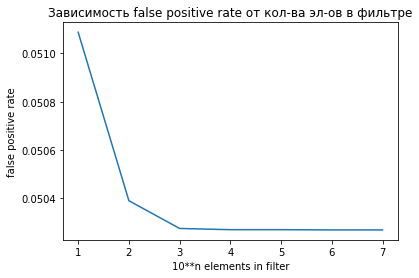

In [5]:
fig, ax = plt.subplots()
ax.plot(range(1,8), ps)
plt.title('Зависимость false positive rate от кол-ва эл-ов в фильтре')
plt.ylabel('false positive rate')
plt.xlabel('10**n elements in filter')

In [6]:
n = 10**6
p = 0.05
bloomf = BloomFilter(n, p)
print("Размер битового массива:", str(bloomf.m))
print("Экспериментальная оценка false positive rate:",str(bloomf.my_p))
print("Количество хеш-функций:", str(bloomf.k))

Размер битового массива: 6235224
Экспериментальная оценка false positive rate: 0.050269488449500244
Количество хеш-функций: 4


In [7]:
S = strings

In [8]:
% time 
for el in tqdm(S): 
    bloomf.add_el(el) 

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


A Jupyter Widget

In [9]:
new_str = StringGenerator('[\w\p\d\l\c\h\p]{105}').render_list(10, unique=True)

In [10]:
test = random.sample(S, 10) + new_str

In [11]:
for i, string in tqdm(enumerate(test)): 
    if bloomf.contains_el(string): 
        if string not in new_str:
            print(str(i+1)+"-ая строка в фильтре")
        else: 
            print(str(i+1)+"-ая строка - false positive") 
    else: 
        print(str(i+1)+"-ая строка не в фильтре") 

A Jupyter Widget

1-ая строка в фильтре
2-ая строка в фильтре
3-ая строка в фильтре
4-ая строка в фильтре
5-ая строка в фильтре
6-ая строка в фильтре
7-ая строка в фильтре
8-ая строка в фильтре
9-ая строка в фильтре
10-ая строка в фильтре
11-ая строка - false positive
12-ая строка не в фильтре
13-ая строка - false positive
14-ая строка - false positive
15-ая строка - false positive
16-ая строка - false positive
17-ая строка не в фильтре
18-ая строка не в фильтре
19-ая строка - false positive
20-ая строка - false positive



Посчитаем $\frac {\epsilon - \hat \epsilon} \epsilon$:

In [12]:
(0.05-bloomf.my_p)/0.05

-0.005389768990004817